В этом уроке вы научитесь строить доверительные интервалы.

После изучения этого урока вы будете знать:
* методы построения доверительных интервалов для среднего для нормально распределенных данных;
* методы построения доверительных интервалов для доли.


# Задание 1

Постановка задачи
Известны результаты замеров коэффициенты теплового расширения различных металлов в серии экспериментов. Построить 95% доверительные интервалы для истинного значения коэффициентов теплового расширения.

aluminum - коэффициенты теплового расширения аллюминия.
copper - коэффициенты теплового расширения меди.
steel - коэффициенты теплового расширения стали.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

aluminum = np.array([6.4e-5 , 3.01e-5 , 2.36e-5, 3.0e-5, 7.0e-5, 4.5e-5, 3.8e-5, 4.2e-5, 2.62e-5, 3.6e-5])
copper = np.array([4.5e-5 , 1.97e-5 , 1.6e-5, 1.97e-5, 4.0e-5, 2.4e-5, 1.9e-5, 2.41e-5 , 1.85e-5, 3.3e-5 ])
steel = np.array([3.3e-5 , 1.2e-5 , 0.9e-5, 1.2e-5, 1.3e-5, 1.6e-5, 1.4e-5, 1.58e-5, 1.32e-5 , 2.1e-5])

aluminum_mean = np.mean(aluminum)
copper_mean = np.mean(copper)
steel_mean = np.mean(steel) # Среднее

aluminum_std = np.std(aluminum) # Среднее квадратичное
copper_std = np.std(copper)
steel_std = np.std(steel)

materials = ['Aluminum', 'Copper', 'Steel']
x_pos = np.arange(len(materials))
CTEs = [aluminum_mean, copper_mean, steel_mean]
error = [aluminum_std, copper_std, steel_std]

Поиск дисперсии

In [30]:
aluminum_var = np.var(aluminum)
copper_var = np.var(copper)
steel_var = np.var(steel) # Поиск дисперсии
aluminum_var

2.1800089999999995e-10

In [31]:
inter_aluminum = scipy.stats.t.interval(alpha=0.95, df = len(aluminum), loc=aluminum_mean, scale = scipy.stats.sem(aluminum))

C:\Users\erik_\AppData\Local\Temp\ipykernel_17280\93257426.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  inter_aluminum = scipy.stats.t.interval(alpha=0.95, df = len(aluminum), loc=aluminum_mean, scale = scipy.stats.sem(aluminum))


In [32]:
inter_copper =scipy.stats.t.interval(alpha=0.95, df = len(copper), loc=copper_mean, scale = scipy.stats.sem(copper))

C:\Users\erik_\AppData\Local\Temp\ipykernel_17280\1059583940.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  inter_copper =scipy.stats.t.interval(alpha=0.95, df = len(copper), loc=copper_mean, scale = scipy.stats.sem(copper))


In [33]:
inter_steel =scipy.stats.t.interval(alpha=0.95, df = len(steel)-1, loc=np.mean(steel), scale = scipy.stats.sem(steel))


C:\Users\erik_\AppData\Local\Temp\ipykernel_17280\3831948918.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  inter_steel =scipy.stats.t.interval(alpha=0.95, df = len(steel)-1, loc=np.mean(steel), scale = scipy.stats.sem(steel))


(1.103779442601425e-05, 2.076220557398575e-05)

In [39]:
inter_aluminum, inter_copper, inter_steel

((2.9523952062767973e-05, 5.145604793723203e-05),
 (1.8861290910520507e-05, 3.293870908947949e-05),
 (1.103779442601425e-05, 2.076220557398575e-05))

In [34]:
steel.max()

3.3e-05

In [35]:
steel.min()

9e-06

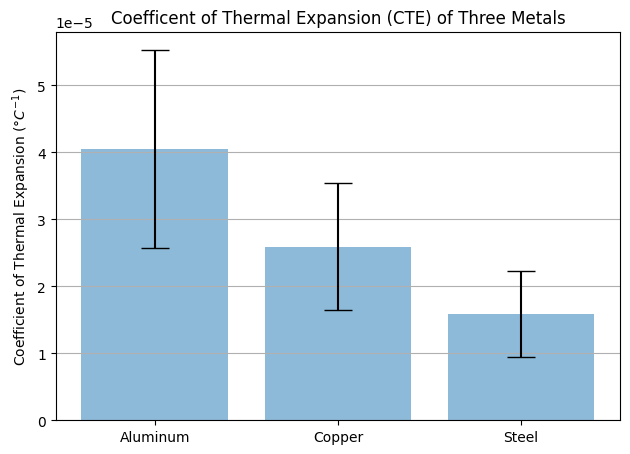

In [36]:
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Coefficient of Thermal Expansion ($\degree C^{-1}$)')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

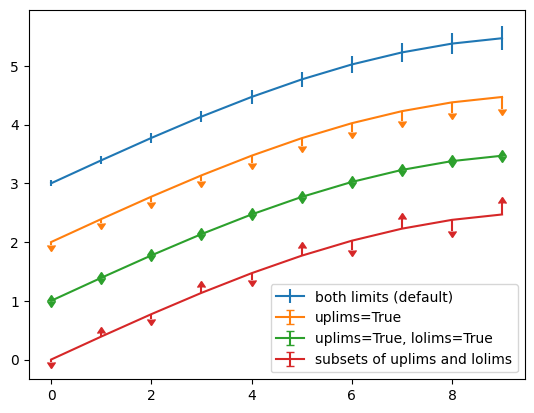

In [37]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

# Задание 2

Точечная оценка доли может быть недостаточно информативной для практикующего клинициста; кроме того, в случае, если в выборке наблюдалось 0 событий, точечная оценка доли (очевидно, равная нулю) не отражает истинную вероятность события. В задании приведены 95%-е интервальные оценки доли.

В случае, когда распределение числа событий хорошо аппроксимируется нормальным законом, используются асимптотические оценки для границ доверительных интервалов.

В случае неприменимости асимптотических формул [Реброва, стр. 143] используется закон точного биномиального распределения и соответствующие формулы для нахождения границ 95%-х доверительных интервалов [Большов Смирнов, стр. 69].
Нижняя и верхняя границы 95%-го доверительного интервала определяется соответственно как 0.025- и 0.975-квантиль В-распределения (читать, бета-распределения) с нижеприведенными параметрами:

m  и  n – m + 1 для нижней границы,

m + 1  и  n – m для верхней границы.

Здесь n – число наблюдений (т. е. объем выборки), m – число произошед-ших событий.


Проводится операция липосакция. 
В задании приведены наблюдения за редкими (или нечастыми) осложнениями. Известно, сколько наступило осложнений из скольких операций. Например, "5 из 38" означает, что из 38 пациентов 5 имели осложнения.

Требуется построить 95% доверительные интервалы для частоты осложнений.

In [38]:
from scipy.stats import beta
import re
import array
import math
#Точечная оценка доли может быть недостаточно информативной для прак-тикующего клинициста; кроме того, в случае, если в выборке наблюдалось 0 событий, точечная оценка доли (очевидно, равная нулю) не отражает ис-тинную вероятность события. В работе приведены 95%-е интервальные оценки доли. В случае, когда распределение числа событий хорошо ап-проксимируется нормальным законом, используются асимптотические оценки для границ доверительных интервалов. В случае неприменимости асимптотических формул [Реброва, стр. 143] используется закон точного биномиального распределения и соответствующие формулы для нахожде-ния границ 95%-х доверительных интервалов [Большов, стр. 69].
#Нижняя и верхняя границы 95%-го доверительного интервала определяет-ся соответственно как 0.025- и 0.975-квантиль В-распределения (читать, бета-распределения) с нижеприведенными параметрами:
#m  и  n – m + 1 для нижней границы,
#m + 1  и  n – m для верхней границы.
#Здесь n – число наблюдений (т. е. объем выборки), m – число произошед-ших событий.

lines = '''5 из 38
3 из 23
14 из 51
6 из 29
2 из 38
0 из 23
0 из 51
0 из 29
1 из 29
7 из 38
8 из 61
20 из 80'''

tmpl = re.compile('(\d+) из (\d+)')
low = []
upp = []

data = lines.split("\n")
for i in range(len(data)):
  num = tmpl.match(data[i])
  case = float(num.group(1))
  observed = float(num.group(2))
  lowBound = beta.ppf(0.025, case, observed - case + 1)
  low.append(0 if math.isnan(lowBound) else lowBound)
  upp.append(beta.ppf(0.975, case + 1, observed - case))

print(low,upp)
for i in range(len(low)):
  print("%2.4f, %2.4f" % (low[i], upp[i]))
  #print("%2.4f" % (upp[i]))

[0.044137440057914416, 0.02775150742279319, 0.1589272653864144, 0.0799418488760801, 0.006438716715091909, 0, 0, 0, 0.000872646883579922, 0.0774268518388488, 0.05836050583974053, 0.1598796445068557] [0.28086384588375324, 0.3358891375371209, 0.4174475230491968, 0.3972469492272394, 0.17749059034764073, 0.14818512891522437, 0.06977703074953864, 0.11944486906950269, 0.17764429548872293, 0.34326199431092114, 0.24215868868336218, 0.35936347590685]
0.0441, 0.2809
0.0278, 0.3359
0.1589, 0.4174
0.0799, 0.3972
0.0064, 0.1775
0.0000, 0.1482
0.0000, 0.0698
0.0000, 0.1194
0.0009, 0.1776
0.0774, 0.3433
0.0584, 0.2422
0.1599, 0.3594
